In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Linear Systems and Reduced Row Echelon Form

## Finding Particular Solutions

When determining a particular solution to a system of linear equations, we can express the right-hand side of the equation system using the pivot columns:

$$b = \sum_{i=1}^{P} \lambda_i p_i$$

where $p_i, i = 1, \ldots, P$, are the pivot columns. The coefficients $\lambda_i$ are easiest to determine if we start with the rightmost pivot column and work backwards to the left.

### Example

In the previous example, we want to find $\lambda_1, \lambda_2, \lambda_3$ such that:

$$
\lambda_1 \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} +
\lambda_2 \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} +
\lambda_3 \begin{pmatrix} -1 \\ 1 \\ 0 \end{pmatrix} =
\begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}
$$

From here, we find relatively directly that $\lambda_3 = 1, \lambda_2 = -1, \lambda_1 = 2$.

When we put everything together, we must not forget the non-pivot columns for which we set the coefficients implicitly to 0. Therefore, we get the particular solution $x = [2, 0, -1, 1, 0]^{\top}$.

## Reduced Row Echelon Form

An equation system is in reduced row-echelon form (also: row-reduced echelon form or row canonical form) if:
1. It is in row-echelon form.
2. Every pivot is 1.
3. The pivot is the only nonzero entry in its column.

The reduced row-echelon form will play an important role later in Section 2.3.3 because it allows us to determine the general solution of a system of linear equations in a straightforward way.

### Gaussian Elimination

Gaussian elimination is an algorithm that performs elementary transformations to bring a system of linear equations into reduced row-echelon form.

### Example .7 (Reduced Row Echelon Form)

Verify that the following matrix is in reduced row-echelon form (the pivots are in bold):

$$
A = \begin{pmatrix} 
\mathbf{1} & 3 & 0 & 0 & 3 \\
0 & 0 & \mathbf{1} & 0 & 9 \\
0 & 0 & 0 & \mathbf{1} & -4
\end{pmatrix}
$$

The key idea for finding the solutions of $Ax = 0$ is to look at the non-pivot columns, which we will need to express as a (linear) combination of the pivot columns. The reduced row echelon form makes this relatively straightforward, and we express the non-pivot columns in terms of sums and multiples of the pivot columns that are on their left: 

The second column is 3 times the first column (we can ignore the pivot columns on the right of the second column). Therefore, to obtain 0, we need to subtract...

Original matrix (already in RREF):
[[ 1  3  0  0  3]
 [ 0  0  1  0  9]
 [ 0  0  0  1 -4]]

Null space basis vectors (columns):
[[-3. -3.]
 [ 1.  0.]
 [ 0. -9.]
 [ 0.  4.]
 [ 0.  1.]]

Verification A * null_basis ≈ 0:
[[0. 0.]
 [0. 0.]
 [0. 0.]]

Augmented matrix [A|b]:
[[ 1  3  0  0  3  2]
 [ 0  0  1  0  9  3]
 [ 0  0  0  1 -4  1]]

RREF of augmented matrix:
[[ 1.  3.  0.  0.  3.  2.]
 [ 0.  0.  1.  0.  9.  3.]
 [ 0.  0.  0.  1. -4.  1.]]

Particular solution (setting free variables to 0):
[2. 0. 3. 1. 0.]

Verification A * x_particular = b:
[2. 3. 1.]
Original b:
[2 3 1]


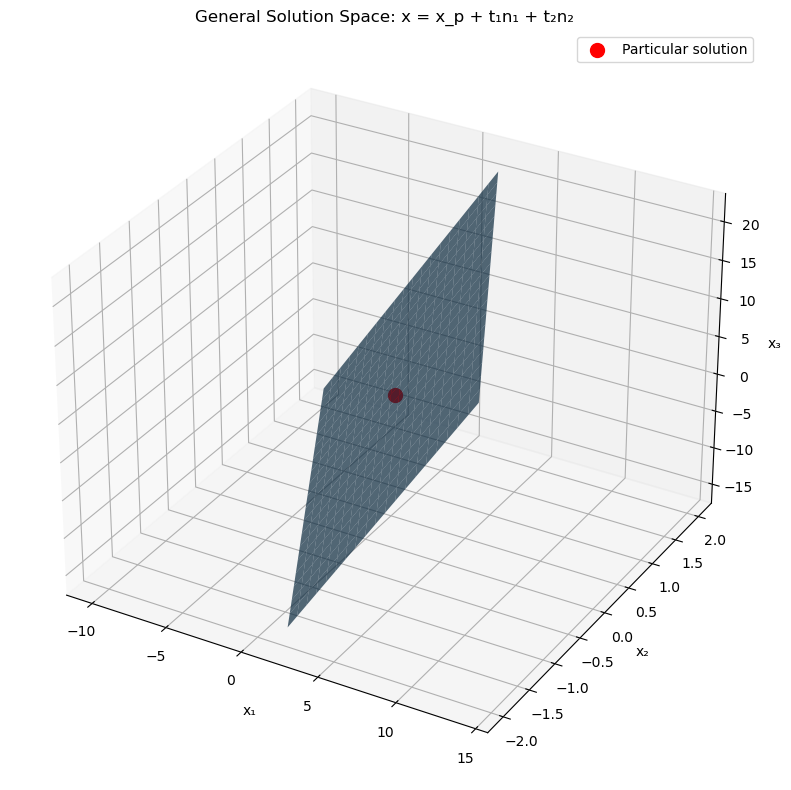

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Define a function to compute the reduced row echelon form
def rref(A, tol=1.0e-12):
    """
    Calculate the Reduced Row Echelon Form of matrix A
    
    Parameters:
    A (numpy.ndarray): Input matrix
    tol (float): Tolerance for zero detection
    
    Returns:
    numpy.ndarray: Matrix in reduced row echelon form
    """
    A = np.copy(A).astype(float)
    m, n = A.shape
    i, j = 0, 0
    
    while i < m and j < n:
        # Find pivot in column j, starting in row i
        pivot_idx = np.argmax(np.abs(A[i:, j])) + i
        pivot_val = A[pivot_idx, j]
        
        # If the pivot is zero, move to next column
        if abs(pivot_val) <= tol:
            j += 1
            continue
            
        # Swap rows i and pivot_idx
        if pivot_idx != i:
            A[[i, pivot_idx]] = A[[pivot_idx, i]]
            
        # Scale pivot row
        A[i] = A[i] / A[i, j]
        
        # Eliminate other rows
        for k in range(m):
            if k != i:
                A[k] = A[k] - A[k, j] * A[i]
                
        i += 1
        j += 1
        
    return A

# Example from the text
A = np.array([
    [1, 3, 0, 0, 3],
    [0, 0, 1, 0, 9],
    [0, 0, 0, 1, -4]
])

print("Original matrix (already in RREF):")
print(A)

# Finding the null space from RREF
def null_space_from_rref(A, tol=1.0e-12):
    """
    Calculate the null space basis from a matrix in RREF
    
    Parameters:
    A (numpy.ndarray): Matrix in reduced row echelon form
    tol (float): Tolerance for zero detection
    
    Returns:
    numpy.ndarray: Basis vectors for the null space
    """
    m, n = A.shape
    
    # Identify pivot and non-pivot columns
    pivot_cols = []
    non_pivot_cols = []
    
    row = 0
    for col in range(n):
        if row < m and abs(A[row, col] - 1.0) <= tol and all(abs(A[i, col]) <= tol for i in range(m) if i != row):
            pivot_cols.append(col)
            row += 1
        else:
            non_pivot_cols.append(col)
    
    # Create basis vectors for the null space
    null_basis = []
    for free_col in non_pivot_cols:
        basis_vector = np.zeros(n)
        basis_vector[free_col] = 1.0
        
        # Set the values for pivot variables
        for i, pivot_col in enumerate(pivot_cols):
            if i < m:  # Only use defined rows
                basis_vector[pivot_col] = -A[i, free_col]
        
        null_basis.append(basis_vector)
    
    return np.array(null_basis).T if null_basis else np.zeros((n, 0))

# Find the null space basis
null_basis = null_space_from_rref(A)
print("\nNull space basis vectors (columns):")
print(null_basis)

# Verify that A * null_basis = 0
print("\nVerification A * null_basis ≈ 0:")
print(np.round(A @ null_basis, 12))

# Solving a system Ax = b
b = np.array([2, 3, 1])

# Augment the matrix [A|b]
augmented = np.column_stack((A, b))
print("\nAugmented matrix [A|b]:")
print(augmented)

# Compute RREF of augmented matrix
rref_augmented = rref(augmented)
print("\nRREF of augmented matrix:")
print(rref_augmented)

# Extract particular solution (set free variables to 0)
def particular_solution(A, b):
    """
    Find a particular solution to Ax = b using RREF
    
    Parameters:
    A (numpy.ndarray): Coefficient matrix
    b (numpy.ndarray): Right-hand side vector
    
    Returns:
    numpy.ndarray: Particular solution vector
    """
    m, n = A.shape
    augmented = np.column_stack((A, b))
    rref_aug = rref(augmented)
    
    # Check for inconsistency
    for i in range(m):
        if all(abs(rref_aug[i, :n]) <= 1.0e-12) and abs(rref_aug[i, n]) > 1.0e-12:
            raise ValueError("System is inconsistent, no solution exists")
    
    # Find pivot and non-pivot columns
    pivot_cols = []
    non_pivot_cols = []
    
    row = 0
    for col in range(n):
        if row < m and abs(rref_aug[row, col] - 1.0) <= 1.0e-12:
            pivot_cols.append(col)
            row += 1
        else:
            non_pivot_cols.append(col)
    
    # Create particular solution (set free variables to 0)
    x_p = np.zeros(n)
    for i, pivot_col in enumerate(pivot_cols):
        if i < m:  # Only use defined rows
            x_p[pivot_col] = rref_aug[i, -1]
    
    return x_p

# Find particular solution
x_particular = particular_solution(A, b)
print("\nParticular solution (setting free variables to 0):")
print(x_particular)

# Verify the particular solution
print("\nVerification A * x_particular = b:")
print(A @ x_particular)
print("Original b:")
print(b)

# General solution visualization (for 2D null space)
if null_basis.shape[1] == 2:
    # Create a grid of points in the null space
    t1 = np.linspace(-2, 2, 20)
    t2 = np.linspace(-2, 2, 20)
    T1, T2 = np.meshgrid(t1, t2)
    
    # Calculate the corresponding points in the solution space
    X = np.zeros((len(t1), len(t2), A.shape[1]))
    for i in range(len(t1)):
        for j in range(len(t2)):
            X[i, j] = x_particular + t1[i] * null_basis[:, 0] + t2[j] * null_basis[:, 1]
    
    # Plot the solution space
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the first three components (if they exist)
    dims = min(3, A.shape[1])
    if dims >= 3:
        ax.plot_surface(X[:,:,0], X[:,:,1], X[:,:,2], alpha=0.7)
        ax.set_xlabel('x₁')
        ax.set_ylabel('x₂')
        ax.set_zlabel('x₃')
    elif dims == 2:
        ax.plot_surface(X[:,:,0], X[:,:,1], np.zeros_like(X[:,:,0]), alpha=0.7)
        ax.set_xlabel('x₁')
        ax.set_ylabel('x₂')
        ax.set_zlabel('')
    
    ax.scatter(x_particular[0], x_particular[1], x_particular[2] if dims >= 3 else 0, 
               color='red', s=100, label='Particular solution')
    
    ax.set_title('General Solution Space: x = x_p + t₁n₁ + t₂n₂')
    ax.legend()
    plt.tight_layout()
    plt.show()

In [2]:
# Pure Python implementation of RREF and linear system solutions
# without external libraries

def print_matrix(matrix):
    """Print a matrix in a readable format"""
    for row in matrix:
        print("[" + " ".join(f"{x:8.4f}" for x in row) + "]")

def create_matrix(rows, cols, data=None):
    """Create a matrix with specified dimensions"""
    if data:
        return [data[i*cols:(i+1)*cols] for i in range(rows)]
    else:
        return [[0.0 for _ in range(cols)] for _ in range(rows)]

def copy_matrix(matrix):
    """Create a deep copy of a matrix"""
    return [row[:] for row in matrix]

def matrix_shape(matrix):
    """Return the shape of the matrix as (rows, cols)"""
    return len(matrix), len(matrix[0]) if matrix else 0

def matrix_row_swap(matrix, row1, row2):
    """Swap two rows in a matrix"""
    matrix[row1], matrix[row2] = matrix[row2], matrix[row1]

def matrix_row_scale(matrix, row, scalar):
    """Multiply a row by a scalar"""
    matrix[row] = [element * scalar for element in matrix[row]]

def matrix_row_add(matrix, source_row, target_row, scalar):
    """Add a scalar multiple of source_row to target_row"""
    for i in range(len(matrix[0])):
        matrix[target_row][i] += scalar * matrix[source_row][i]

def matrix_multiply(A, B):
    """Multiply two matrices A and B"""
    m, n = len(A), len(A[0])
    p = len(B[0])
    
    # Check if matrices can be multiplied
    if n != len(B):
        raise ValueError("Matrix dimensions don't match for multiplication")
    
    C = create_matrix(m, p)
    for i in range(m):
        for j in range(p):
            C[i][j] = sum(A[i][k] * B[k][j] for k in range(n))
    
    return C

def transpose(matrix):
    """Transpose a matrix"""
    rows, cols = matrix_shape(matrix)
    result = create_matrix(cols, rows)
    
    for i in range(rows):
        for j in range(cols):
            result[j][i] = matrix[i][j]
    
    return result

def rref(matrix, tol=1.0e-12):
    """
    Compute the Reduced Row Echelon Form (RREF) of a matrix
    
    Args:
        matrix: Input matrix as a list of lists
        tol: Tolerance for zero detection
        
    Returns:
        Matrix in RREF form
    """
    A = copy_matrix(matrix)
    m, n = matrix_shape(A)
    
    i, j = 0, 0
    
    while i < m and j < n:
        # Find pivot in column j, starting in row i
        pivot_idx = i
        max_val = abs(A[i][j])
        
        for k in range(i + 1, m):
            if abs(A[k][j]) > max_val:
                max_val = abs(A[k][j])
                pivot_idx = k
        
        pivot_val = A[pivot_idx][j]
        
        # If the pivot is zero, move to next column
        if abs(pivot_val) <= tol:
            j += 1
            continue
            
        # Swap rows i and pivot_idx if needed
        if pivot_idx != i:
            matrix_row_swap(A, i, pivot_idx)
        
        # Scale pivot row to make pivot = 1
        matrix_row_scale(A, i, 1.0 / A[i][j])
        
        # Eliminate other rows
        for k in range(m):
            if k != i and abs(A[k][j]) > tol:
                factor = -A[k][j]
                matrix_row_add(A, i, k, factor)
                
        i += 1
        j += 1
    
    return A

def find_pivot_columns(matrix, tol=1.0e-12):
    """
    Identify pivot and non-pivot columns in a matrix in RREF
    
    Returns:
        tuple (pivot_cols, non_pivot_cols)
    """
    m, n = matrix_shape(matrix)
    pivot_cols = []
    non_pivot_cols = []
    
    row = 0
    for col in range(n):
        is_pivot = False
        if row < m:
            # Check if this column has a pivot (1 in current row, 0s elsewhere)
            if abs(matrix[row][col] - 1.0) <= tol:
                is_pivot = True
                for i in range(m):
                    if i != row and abs(matrix[i][col]) > tol:
                        is_pivot = False
                        break
                
        if is_pivot:
            pivot_cols.append(col)
            row += 1
        else:
            non_pivot_cols.append(col)
    
    return pivot_cols, non_pivot_cols

def null_space_basis(matrix, tol=1.0e-12):
    """
    Calculate a basis for the null space of a matrix in RREF
    
    Returns:
        List of basis vectors as columns (list of lists)
    """
    m, n = matrix_shape(matrix)
    pivot_cols, non_pivot_cols = find_pivot_columns(matrix, tol)
    
    # For each non-pivot column, create a basis vector
    basis = []
    for free_col in non_pivot_cols:
        # Start with zeros and set free variable to 1
        basis_vector = [0.0] * n
        basis_vector[free_col] = 1.0
        
        # Set values for pivot variables to create a vector in the null space
        for i, pivot_col in enumerate(pivot_cols):
            if i < m:  # Only use rows that exist
                basis_vector[pivot_col] = -matrix[i][free_col]
        
        basis.append(basis_vector)
    
    # Return as columns
    return transpose(basis) if basis else [[]]

def particular_solution(A, b, tol=1.0e-12):
    """
    Find a particular solution to the system Ax = b
    
    Args:
        A: Coefficient matrix
        b: Right-hand side vector
        tol: Tolerance for zero detection
        
    Returns:
        Particular solution vector or None if no solution exists
    """
    m, n = matrix_shape(A)
    
    # Create augmented matrix [A|b]
    augmented = copy_matrix(A)
    for i in range(m):
        augmented[i].append(b[i])
    
    # Convert to RREF
    rref_aug = rref(augmented, tol)
    
    # Check for inconsistency
    for i in range(m):
        if all(abs(rref_aug[i][j]) <= tol for j in range(n)) and abs(rref_aug[i][n]) > tol:
            return None  # Inconsistent system, no solution
    
    # Find pivot columns
    pivot_cols, _ = find_pivot_columns(A, tol)
    
    # Create particular solution (set free variables to 0)
    x_p = [0.0] * n
    row = 0
    for col in range(n):
        if col in pivot_cols and row < m:
            x_p[col] = rref_aug[row][n]  # Use RHS value
            row += 1
    
    return x_p

def general_solution_description(A, b, tol=1.0e-12):
    """
    Describe the general solution to the system Ax = b
    
    Returns:
        String description of the general solution
    """
    x_p = particular_solution(A, b, tol)
    
    if x_p is None:
        return "The system is inconsistent and has no solution."
    
    null_basis = null_space_basis(rref(A, tol), tol)
    
    if not null_basis or null_basis == [[]]:
        return "The system has a unique solution: x = " + str(x_p)
    
    # Describe the general solution
    description = "The general solution is: x = x_p + t₁n₁"
    if len(null_basis[0]) > 1:
        for i in range(2, len(null_basis[0]) + 1):
            description += f" + t₍{i}₎n₍{i}₎"
    
    description += "\nwhere x_p = " + str(x_p)
    
    description += "\nand the null space basis vectors are:"
    for i, basis_vec in enumerate(transpose(null_basis)):
        description += f"\nn_{i+1} = {basis_vec}"
    
    return description

def verify_solution(A, x, b, tol=1.0e-12):
    """
    Verify if x is a solution to Ax = b
    
    Returns:
        Boolean indicating if x is a solution
    """
    Ax = [sum(A[i][j] * x[j] for j in range(len(x))) for i in range(len(A))]
    
    for i in range(len(b)):
        if abs(Ax[i] - b[i]) > tol:
            return False
    
    return True

# Example usage
if __name__ == "__main__":
    # Matrix from the given example
    A = [
        [1, 3, 0, 0, 3],
        [0, 0, 1, 0, 9],
        [0, 0, 0, 1, -4]
    ]
    
    print("Original matrix (already in RREF):")
    print_matrix(A)
    
    # Compute null space basis
    null_space = null_space_basis(A)
    print("\nNull space basis vectors (columns):")
    print_matrix(null_space)
    
    # Verify null space basis
    print("\nVerification that A * null_basis = 0:")
    result = matrix_multiply(A, null_space)
    print_matrix(result)
    
    # Solve a system Ax = b
    b = [2, 3, 1]
    print("\nSolving Ax = b where b =", b)
    
    x_p = particular_solution(A, b)
    print("\nParticular solution:")
    print(x_p)
    
    # Verify particular solution
    is_solution = verify_solution(A, x_p, b)
    print(f"\nVerification: Is x_p a solution? {is_solution}")
    
    # General solution description
    print("\nGeneral solution:")
    print(general_solution_description(A, b))

Original matrix (already in RREF):
[  1.0000   3.0000   0.0000   0.0000   3.0000]
[  0.0000   0.0000   1.0000   0.0000   9.0000]
[  0.0000   0.0000   0.0000   1.0000  -4.0000]

Null space basis vectors (columns):
[ -3.0000  -3.0000]
[  1.0000   0.0000]
[  0.0000  -9.0000]
[  0.0000   4.0000]
[  0.0000   1.0000]

Verification that A * null_basis = 0:
[  0.0000   0.0000]
[  0.0000   0.0000]
[  0.0000   0.0000]

Solving Ax = b where b = [2, 3, 1]

Particular solution:
[2.0, 0.0, 3.0, 1.0, 0.0]

Verification: Is x_p a solution? True

General solution:
The general solution is: x = x_p + t₁n₁ + t₍2₎n₍2₎
where x_p = [2.0, 0.0, 3.0, 1.0, 0.0]
and the null space basis vectors are:
n_1 = [-3.0, 1.0, -0.0, -0.0, 0.0]
n_2 = [-3.0, 0.0, -9.0, 4.0, 1.0]


# Solving Linear Systems Using RREF

## Non-Pivot Columns and Solution Expressions

When analyzing the matrix in reduced row echelon form, we express non-pivot columns as linear combinations of pivot columns. For example, the second column is three times the first column. 

For the fifth column (our second non-pivot column), it can be expressed as:
- 3 times the first pivot column
- 9 times the second pivot column
- −4 times the third pivot column

Translating this to the actual column indices:
- 3 times the first column
- 0 times the second column (non-pivot)
- 9 times the third column (second pivot column)
- −4 times the fourth column (third pivot column)

To solve the homogeneous equation system $Ax = 0$, we subtract these relationships from the fifth column to obtain 0.

Summarizing, all solutions of $Ax = 0, x \in \mathbb{R}^5$ are given by:

$$x \in \mathbb{R}^5: x = \lambda_1 \begin{pmatrix} 3 \\ -1 \\ 0 \\ 0 \\ 0 \end{pmatrix} + \lambda_2 \begin{pmatrix} 3 \\ 0 \\ 9 \\ -4 \\ -1 \end{pmatrix}, \lambda_1, \lambda_2 \in \mathbb{R}$$

##  The Minus-1 Trick

Here, we introduce a practical trick for finding solutions $x$ of a homogeneous system of linear equations $Ax = 0$, where $A \in \mathbb{R}^{k \times n}$, $x \in \mathbb{R}^n$.

We start by assuming that $A$ is in reduced row-echelon form without any zero rows, i.e.,

$$A = \begin{pmatrix}
0 & \cdots & 0 & 1 & * & \cdots & * & 0 & * & \cdots & * & 0 & * & \cdots & * \\
\vdots & \ddots & \vdots & 0 & \ddots & \ddots & \vdots & 0 & \vdots & \ddots & \vdots & 0 & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0 & 0 & \cdots & 0 & 1 & * & \cdots & * & 0 & \cdots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots & 0 & \ddots & \ddots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & \cdots & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & \cdots & 0 & 1 & * & \cdots & *
\end{pmatrix}$$

where $*$ can be any real number, with the constraints that:
- The first nonzero entry per row must be 1
- All other entries in the corresponding column must be 0

The columns $j_1, \ldots, j_k$ with the pivots (marked in bold) are the standard unit vectors $e_1, \ldots, e_k \in \mathbb{R}^k$.

We extend this matrix to an $n \times n$-matrix $\tilde{A}$ by adding $n - k$ rows of the form:

$$\begin{pmatrix} 0 & \cdots & 0 & -1 & 0 & \cdots & 0 \end{pmatrix}$$

These rows are positioned so that the diagonal of the augmented matrix $\tilde{A}$ contains either 1 or −1.

**Key insight**: The columns of $\tilde{A}$ that contain the −1 as pivots are solutions of the homogeneous equation system $Ax = 0$. These columns form a basis of the solution space of $Ax = 0$, which we will later call the kernel or null space.

### Example  (Minus-1 Trick)

Let's revisit the matrix in equation (2.53), which is already in reduced REF:

$$A = \begin{pmatrix}
1 & 3 & 0 & 0 & 3 \\
0 & 0 & 1 & 0 & 9 \\
0 & 0 & 0 & 1 & -4
\end{pmatrix}$$

We augment this to a $5 \times 5$ matrix by adding rows of the form (2.52) at places where pivots on the diagonal are missing:

$$\tilde{A} = \begin{pmatrix}
1 & 3 & 0 & 0 & 3 \\
0 & -1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 9 \\
0 & 0 & 0 & 1 & -4 \\
0 & 0 & 0 & 0 & -1
\end{pmatrix}$$

From this form, we can immediately read out the solutions of $Ax = 0$ by taking the columns of $\tilde{A}$ which contain $-1$ on the diagonal:

$$x \in \mathbb{R}^5: x = \lambda_1 \begin{pmatrix} 3 \\ -1 \\ 0 \\ 0 \\ 0 \end{pmatrix} + \lambda_2 \begin{pmatrix} 3 \\ 0 \\ 9 \\ -4 \\ -1 \end{pmatrix}, \lambda_1, \lambda_2 \in \mathbb{R}$$

This is identical to the solution in equation (2.50) that we obtained by "insight".

## Calculating the Inverse

To compute the inverse $A^{-1}$ of $A \in \mathbb{R}^{n \times n}$, we need to find a matrix $X$ that satisfies $AX = I_n$. Then, $X = A^{-1}$.

We can write this as a set of simultaneous linear equations $AX = I_n$, where we solve for $X = [x_1 | \cdots | x_n]$.

Using augmented matrix notation for a compact representation:

$$[A|I_n] \Rightarrow \cdots \Rightarrow [I_n|A^{-1}]$$

This means that if we bring the augmented equation system into reduced row-echelon form, we can read out the inverse on the right-hand side of the equation system.

Therefore, determining the inverse of a matrix is equivalent to solving systems of linear equations.

In [3]:
# Implementation of the Minus-1 Trick and Matrix Inverse calculation

def print_matrix(matrix, precision=4):
    """Print a matrix in a readable format"""
    for row in matrix:
        print("[" + " ".join(f"{x:{precision+6}.{precision}f}" for x in row) + "]")

def create_matrix(rows, cols, data=None):
    """Create a matrix with specified dimensions"""
    if data:
        return [data[i*cols:(i+1)*cols] for i in range(rows)]
    else:
        return [[0.0 for _ in range(cols)] for _ in range(rows)]

def copy_matrix(matrix):
    """Create a deep copy of a matrix"""
    return [row[:] for row in matrix]

def identity_matrix(n):
    """Create an n×n identity matrix"""
    result = create_matrix(n, n)
    for i in range(n):
        result[i][i] = 1.0
    return result

def matrix_shape(matrix):
    """Return the shape of the matrix as (rows, cols)"""
    return len(matrix), len(matrix[0]) if matrix else 0

def matrix_row_swap(matrix, row1, row2):
    """Swap two rows in a matrix"""
    matrix[row1], matrix[row2] = matrix[row2], matrix[row1]

def matrix_row_scale(matrix, row, scalar):
    """Multiply a row by a scalar"""
    matrix[row] = [element * scalar for element in matrix[row]]

def matrix_row_add(matrix, source_row, target_row, scalar):
    """Add a scalar multiple of source_row to target_row"""
    for i in range(len(matrix[0])):
        matrix[target_row][i] += scalar * matrix[source_row][i]

def rref(matrix, tol=1.0e-12):
    """
    Compute the Reduced Row Echelon Form (RREF) of a matrix
    
    Args:
        matrix: Input matrix as a list of lists
        tol: Tolerance for zero detection
        
    Returns:
        Matrix in RREF form
    """
    A = copy_matrix(matrix)
    m, n = matrix_shape(A)
    
    i, j = 0, 0
    
    while i < m and j < n:
        # Find pivot in column j, starting in row i
        pivot_idx = i
        max_val = abs(A[i][j]) if i < m else 0
        
        for k in range(i + 1, m):
            if abs(A[k][j]) > max_val:
                max_val = abs(A[k][j])
                pivot_idx = k
        
        # If the pivot is zero, move to next column
        if max_val <= tol:
            j += 1
            continue
            
        # Swap rows i and pivot_idx if needed
        if pivot_idx != i:
            matrix_row_swap(A, i, pivot_idx)
        
        # Scale pivot row to make pivot = 1
        pivot_val = A[i][j]
        if abs(pivot_val - 1.0) > tol:
            matrix_row_scale(A, i, 1.0 / pivot_val)
        
        # Eliminate other rows
        for k in range(m):
            if k != i and abs(A[k][j]) > tol:
                factor = -A[k][j]
                matrix_row_add(A, i, k, factor)
                
        i += 1
        j += 1
    
    return A

def find_pivot_positions(matrix, tol=1.0e-12):
    """
    Find the positions of pivots in a matrix in RREF
    
    Returns:
        List of (row, column) tuples indicating pivot positions
    """
    m, n = matrix_shape(matrix)
    pivot_positions = []
    
    i, j = 0, 0
    while i < m and j < n:
        # Find first non-zero element in column j, starting from row i
        while j < n and all(abs(matrix[row][j]) <= tol for row in range(i, m)):
            j += 1
        
        if j < n:
            # Find the pivot in this column
            for k in range(i, m):
                if abs(matrix[k][j] - 1.0) <= tol and all(abs(matrix[k][l]) <= tol for l in range(j)):
                    pivot_positions.append((k, j))
                    i = k + 1
                    j += 1
                    break
    
    return pivot_positions

def minus_one_trick(A, tol=1.0e-12):
    """
    Apply the minus-1 trick to find a basis for the null space of A
    
    Args:
        A: Matrix in RREF form
        tol: Tolerance for zero detection
        
    Returns:
        List of basis vectors for the null space
    """
    m, n = matrix_shape(A)
    
    # Find pivot positions
    pivot_positions = []
    row = 0
    for col in range(n):
        if row < m and abs(A[row][col] - 1.0) <= tol:
            pivot_positions.append((row, col))
            row += 1
    
    # Build the augmented matrix Ã with -1 entries
    A_tilde = copy_matrix(A)
    
    # Add rows to make Ã a square matrix
    for i in range(m, n):
        A_tilde.append([0.0] * n)
    
    # Find columns without pivots on the diagonal
    diagonal_pivot_columns = [col for row, col in pivot_positions if row == col]
    free_diagonal_columns = [col for col in range(n) if col not in diagonal_pivot_columns]
    
    # Add -1 entries at the corresponding diagonal positions
    for i, col in enumerate(free_diagonal_columns):
        if m + i < n:  # Only if we haven't added too many rows
            A_tilde[m + i][col] = -1.0
    
    # Extract the null space basis vectors
    null_basis = []
    for col in range(n):
        if any(abs(A_tilde[row][col] + 1.0) <= tol for row in range(n)):
            # This column contains a -1 on the diagonal
            basis_vector = [A_tilde[row][col] for row in range(n)]
            null_basis.append(basis_vector)
    
    return null_basis

def matrix_inverse(A, tol=1.0e-12):
    """
    Calculate the inverse of a square matrix using augmented matrix approach
    
    Args:
        A: Square matrix to invert
        tol: Tolerance for zero detection
        
    Returns:
        Inverse matrix if it exists, None otherwise
    """
    m, n = matrix_shape(A)
    if m != n:
        raise ValueError("Matrix must be square to have an inverse")
    
    # Create augmented matrix [A|I]
    I = identity_matrix(n)
    augmented = [A[i] + I[i] for i in range(n)]
    
    # Convert to RREF
    rref_augmented = rref(augmented, tol)
    
    # Check if A is invertible (left side should be identity)
    for i in range(n):
        if abs(rref_augmented[i][i] - 1.0) > tol:
            return None  # Not invertible
        for j in range(n):
            if i != j and abs(rref_augmented[i][j]) > tol:
                return None  # Not invertible
    
    # Extract the inverse from the right side
    inverse = [row[n:] for row in rref_augmented]
    return inverse

def main():
    # Example from the text
    A = [
        [1, 3, 0, 0, 3],
        [0, 0, 1, 0, 9],
        [0, 0, 0, 1, -4]
    ]
    
    print("Original matrix (already in RREF):")
    print_matrix(A)
    
    # Apply minus-1 trick
    null_basis = minus_one_trick(A)
    
    print("\nBasis vectors for the null space (using minus-1 trick):")
    for i, vector in enumerate(null_basis):
        print(f"Vector {i+1}:", end=" ")
        print("[" + " ".join(f"{x:8.4f}" for x in vector) + "]")
    
    # Verify the null space basis
    print("\nVerification that Ax = 0 for each basis vector:")
    for i, vector in enumerate(null_basis):
        result = [sum(A[row][col] * vector[col] for col in range(len(vector))) for row in range(len(A))]
        print(f"A * vector {i+1} = [" + " ".join(f"{x:8.4f}" for x in result) + "]")
    
    # Example for matrix inverse
    B = [
        [1, 2, 0],
        [2, 3, 0],
        [4, 5, 1]
    ]
    
    print("\n\nExample for matrix inverse calculation:")
    print("Original matrix B:")
    print_matrix(B)
    
    # Calculate inverse
    B_inv = matrix_inverse(B)
    
    if B_inv:
        print("\nInverse of B:")
        print_matrix(B_inv)
        
        # Verify inverse: B * B_inv should be identity
        print("\nVerification B * B_inv (should be identity):")
        product = []
        for i in range(len(B)):
            row = []
            for j in range(len(B_inv[0])):
                val = sum(B[i][k] * B_inv[k][j] for k in range(len(B)))
                row.append(val)
            product.append(row)
        print_matrix(product)
    else:
        print("\nMatrix B is not invertible.")

if __name__ == "__main__":
    main()

Original matrix (already in RREF):
[    1.0000     3.0000     0.0000     0.0000     3.0000]
[    0.0000     0.0000     1.0000     0.0000     9.0000]
[    0.0000     0.0000     0.0000     1.0000    -4.0000]

Basis vectors for the null space (using minus-1 trick):
Vector 1: [  3.0000   0.0000   0.0000  -1.0000   0.0000]
Vector 2: [  0.0000   1.0000   0.0000   0.0000  -1.0000]

Verification that Ax = 0 for each basis vector:
A * vector 1 = [  3.0000   0.0000  -1.0000]
A * vector 2 = [  0.0000  -9.0000   4.0000]


Example for matrix inverse calculation:
Original matrix B:
[    1.0000     2.0000     0.0000]
[    2.0000     3.0000     0.0000]
[    4.0000     5.0000     1.0000]

Inverse of B:
[   -3.0000     2.0000     0.0000]
[    2.0000    -1.0000     0.0000]
[    2.0000    -3.0000     1.0000]

Verification B * B_inv (should be identity):
[    1.0000     0.0000     0.0000]
[    0.0000     1.0000     0.0000]
[   -0.0000    -0.0000     1.0000]


## Example : Calculating an Inverse Matrix by Gaussian Elimination

To determine the inverse of the matrix:

$$
A = \begin{bmatrix} 1 & 0 & 2 & 0 \\ 1 & 1 & 0 & 0 \\ 1 & 2 & 0 & 1 \\ 1 & 1 & 1 & 1 \end{bmatrix}
$$

We write down the augmented matrix:

$$
\left[ \begin{array}{cccc|cccc} 1 & 0 & 2 & 0 & 1 & 0 & 0 & 0 \\ 1 & 1 & 0 & 0 & 0 & 1 & 0 & 0 \\ 1 & 2 & 0 & 1 & 0 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 & 0 & 0 & 0 & 1 \end{array} \right]
$$

And use Gaussian elimination to bring it into reduced row-echelon form:

$$
\left[ \begin{array}{cccc|cccc} 1 & 0 & 0 & 0 & -1 & 2 & -2 & 2 \\ 0 & 1 & 0 & 0 & 1 & -1 & 2 & -2 \\ 0 & 0 & 1 & 0 & 1 & -1 & 1 & -1 \\ 0 & 0 & 0 & 1 & -1 & 0 & -1 & 2 \end{array} \right]
$$

The desired inverse is given by the right-hand side:

$$
A^{-1} = \begin{bmatrix} -1 & 2 & -2 & 2 \\ 1 & -1 & 2 & -2 \\ 1 & -1 & 1 & -1 \\ -1 & 0 & -1 & 2 \end{bmatrix}
$$

We can verify that this is indeed the inverse by performing the multiplication $AA^{-1}$ and observing that we recover the identity matrix $I_4$.

## Algorithms for Solving a System of Linear Equations

In the following, we briefly discuss approaches to solving a system of linear equations of the form $Ax = b$. We assume that a solution exists. If there is no solution, we need to resort to approximate solutions, which are not covered in this chapter. One way to solve the approximate problem is using linear regression, discussed in Chapter 9.

In special cases, we may determine the inverse $A^{-1}$, such that the solution of $Ax = b$ is given as $x = A^{-1}b$. However, this is only possible if $A$ is a square and invertible matrix, which is often not the case.

Otherwise, under mild assumptions (i.e., $A$ needs to have linearly independent columns), we can use the transformation:

$$
Ax = b \Leftrightarrow A^T Ax = A^T b \Leftrightarrow x = (A^T A)^{-1} A^T b
$$

and use the Moore-Penrose pseudo-inverse $(A^T A)^{-1} A^T$ to determine the Moore-Penrose solution:

$$
x = (A^T A)^{-1} A^T b
$$

which also corresponds to the minimum norm least-squares solution. A disadvantage of this approach is that it requires many computations for the matrix-matrix product and computing the inverse of $A^T A$. Moreover, for reasons of numerical precision it is generally not recommended to compute the inverse or pseudo-inverse.

In the following, we therefore briefly discuss alternative approaches to solving systems of linear equations. Gaussian elimination plays an important role when computing determinants (Section 4.1), checking whether a set of vectors is linearly independent (Section 2.5), computing the inverse of a matrix (Section 2.2.2), computing the rank of a matrix (Section 2.6.2), and determining a basis of a vector space (Section 2.6.1). Gaussian elimination is an intuitive and constructive way to solve a system of linear equations with thousands of variables. However, for systems with millions of variables, it is impractical as the required number of arithmetic operations scales cubically in the number of simultaneous equations.

In practice, systems of many linear equations are solved indirectly, by either stationary iterative methods, such as the Richardson method, the Jacobi method, the Gauß-Seidel method, and the successive over-relaxation method, or Krylov subspace methods, such as conjugate gradients, generalized minimal residual, or biconjugate gradients. We refer to the books by Stoer and Burlirsch (2002), Strang (2003), and Liesen and Mehrmann (2015) for further details.

Let $x^*$ be a solution of $Ax = b$. The key idea of these iterative methods is to set up an iteration of the form:

$$
x^{(k+1)} = Cx^{(k)} + d
$$

for suitable $C$ and $d$ that reduces the residual error $\|x^{(k+1)} - x^*\|$ in every iteration and converges to $x^*$. We will introduce norms $\|\cdot\|$, which allow us to compute similarities between vectors, in Section 3.1.

## 2.4 Vector Spaces

Thus far, we have looked at systems of linear equations and how to solve them (Section 2.3). We saw that systems of linear equations can be compactly represented using matrix-vector notation (2.10). In the following, we will have a closer look at vector spaces, i.e., a structured space in which vectors live. In the beginning of this chapter, we informally characterized vectors as objects that can be added together and multiplied by a scalar, and they remain objects of the same type. Now, we are ready to formalize this, and we will start by introducing the concept of a group, which is a set of elements and an operation defined on these elements that keeps some structure of the set intact.

## 2.4.1 Groups

Groups play an important role in computer science. Besides providing a fundamental framework for operations on sets, they are heavily used in cryptography, coding theory, and graphics.

**Definition 2.7 (Group).** Consider a set $G$ and an operation $\otimes : G \times G \rightarrow G$ defined on $G$. Then $G := (G, \otimes)$ is called a group if the following hold:

1.  **Closure of $G$ under $\otimes$:** $\forall x, y \in G : x \otimes y \in G$
2.  **Associativity:** $\forall x, y, z \in G : (x \otimes y) \otimes z = x \otimes (y \otimes z)$
3.  **Neutral element:** $\exists e \in G \forall x \in G : x \otimes e = x$ and $e \otimes x = x$
4.  **Inverse element:** $\forall x \in G \exists y \in G : x \otimes y = e$ and $y \otimes x = e$, where $e$ is the neutral element. We often write $x^{-1}$ to denote the inverse element of $x$.

**Remark.** The inverse element is defined with respect to the operation $\otimes$ and does not necessarily mean $\frac{1}{x}$. $\diamondsuit$

If additionally $\forall x, y \in G : x \otimes y = y \otimes x$, then $G = (G, \otimes)$ is an Abelian group (commutative).

**Example 2.10 (Groups)** Let us have a look at some examples of sets with associated operations and see whether they are groups:

* $(\mathbb{Z}, +)$ is an Abelian group.
* $(\mathbb{N}_0, +)$ is not a group: Although $(\mathbb{N}_0, +)$ possesses a neutral element (0), the inverse elements are missing.
* $(\mathbb{Z}, \cdot)$ is not a group: Although $(\mathbb{Z}, \cdot)$ contains a neutral element (1), the inverse elements for any $z \in \mathbb{Z}, z \neq \pm 1$, are missing.
* $(\mathbb{R}, \cdot)$ is not a group since 0 does not possess an inverse element.
* $(\mathbb{R} \setminus \{0\}, \cdot)$ is Abelian.
* $(\mathbb{R}^n, +)$, $(\mathbb{Z}^n, +)$, $n \in \mathbb{N}$ are Abelian if $+$ is defined componentwise, i.e., $(x_1, \cdots, x_n) + (y_1, \cdots, y_n) = (x_1 + y_1, \cdots, x_n + y_n)$.

    $$
    (x_1, \cdots, x_n) + (y_1, \cdots, y_n) = (x_1 + y_1, \cdots, x_n + y_n)
    $$

    Then, $(x_1, \cdots, x_n)^{-1} := (-x_1, \cdots, -x_n)$ is the inverse element and $e = (0, \cdots, 0)$ is the neutral element.
* $(\mathbb{R}^{m \times n}, +)$, the set of $m \times n$-matrices is Abelian (with componentwise addition as defined in (2.61)).
* Let us have a closer look at $(\mathbb{R}^{n \times n}, \cdot)$, i.e., the set of $n \times n$-matrices with matrix multiplication as defined in (2.13).
    * Closure and associativity follow directly from the definition of matrix multiplication.
    * Neutral element: The identity matrix $I_n$ is the neutral element with respect to matrix multiplication “$\cdot$” in $(\mathbb{R}^{n \times n}, \cdot)$.

In [4]:
import numpy as np

def gaussian_elimination_inverse(matrix):
    """
    Calculates the inverse of a matrix using Gaussian elimination.

    Args:
        matrix (numpy.ndarray): The square matrix to invert.

    Returns:
        numpy.ndarray: The inverse of the matrix, or None if the matrix is singular.
    """
    n = matrix.shape[0]
    augmented_matrix = np.hstack((matrix, np.eye(n)))  # Augment with identity

    for i in range(n):
        # Find pivot
        pivot = augmented_matrix[i, i]
        if abs(pivot) < 1e-10:  # Check for near-zero pivot (singular matrix)
            # Try to swap rows to find a non-zero pivot.
            found_pivot=False
            for j in range(i+1, n):
                if abs(augmented_matrix[j,i]) > 1e-10:
                    augmented_matrix[[i,j]] = augmented_matrix[[j,i]] #swap rows
                    pivot = augmented_matrix[i,i]
                    found_pivot=True
                    break
            if found_pivot==False:
                return None  # Matrix is singular

        # Normalize row
        augmented_matrix[i, :] /= pivot

        # Eliminate other rows
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j, i]
                augmented_matrix[j, :] -= factor * augmented_matrix[i, :]

    return augmented_matrix[:, n:]  # Return the right half (inverse)

def solve_linear_system_pseudo_inverse(A, b):
    """
    Solves a linear system Ax = b using the Moore-Penrose pseudo-inverse.

    Args:
        A (numpy.ndarray): The coefficient matrix.
        b (numpy.ndarray): The right-hand side vector.

    Returns:
        numpy.ndarray: The solution vector x.
    """
    A_transpose = A.T
    A_transpose_A = A_transpose @ A
    A_transpose_A_inv = np.linalg.inv(A_transpose_A)
    pseudo_inverse = A_transpose_A_inv @ A_transpose
    x = pseudo_inverse @ b
    return x

# Example usage:
A = np.array([[1, 0, 2, 0],
              [1, 1, 0, 0],
              [1, 2, 0, 1],
              [1, 1, 1, 1]])

A_inv = gaussian_elimination_inverse(A)

if A_inv is not None:
    print("Inverse of A (Gaussian Elimination):\n", A_inv)
    print("Verification (A @ A_inv):\n", A @ A_inv)
else:
    print("Matrix A is singular, no inverse exists.")

b = np.array([1, 2, 3, 4])
x = solve_linear_system_pseudo_inverse(A, b)
print("\nSolution of Ax = b (Pseudo-inverse):\n", x)

# Example of a singular matrix
singular_matrix = np.array([[1,1],[1,1]])
singular_matrix_inverse = gaussian_elimination_inverse(singular_matrix)

if singular_matrix_inverse is None:
    print("\nSingular Matrix test: matrix is singular")

Inverse of A (Gaussian Elimination):
 [[-1.  2. -2.  2.]
 [ 1. -1.  2. -2.]
 [ 1. -1.  1. -1.]
 [-1.  0. -1.  2.]]
Verification (A @ A_inv):
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Solution of Ax = b (Pseudo-inverse):
 [ 5. -3. -2.  4.]

Singular Matrix test: matrix is singular


In [5]:
def gaussian_elimination_inverse(matrix):
    """
    Calculates the inverse of a matrix using Gaussian elimination (no libraries).

    Args:
        matrix (list of lists): The square matrix to invert.

    Returns:
        list of lists: The inverse of the matrix, or None if the matrix is singular.
    """
    n = len(matrix)
    augmented_matrix = [row + [1.0 if i == j else 0.0 for j in range(n)] for i, row in enumerate(matrix)]

    for i in range(n):
        # Find pivot
        pivot = augmented_matrix[i][i]
        if abs(pivot) < 1e-10:
            # Try to swap rows
            found_pivot = False
            for j in range(i + 1, n):
                if abs(augmented_matrix[j][i]) > 1e-10:
                    augmented_matrix[i], augmented_matrix[j] = augmented_matrix[j], augmented_matrix[i]
                    pivot = augmented_matrix[i][i]
                    found_pivot = True
                    break
            if not found_pivot:
                return None  # Matrix is singular

        # Normalize row
        for j in range(2 * n):
            augmented_matrix[i][j] /= pivot

        # Eliminate other rows
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j][i]
                for k in range(2 * n):
                    augmented_matrix[j][k] -= factor * augmented_matrix[i][k]

    inverse = [row[n:] for row in augmented_matrix]
    return inverse

def solve_linear_system_pseudo_inverse(A, b):
    """
    Solves a linear system Ax = b using the Moore-Penrose pseudo-inverse (no libraries).

    Args:
        A (list of lists): The coefficient matrix.
        b (list): The right-hand side vector.

    Returns:
        list: The solution vector x.
    """
    A_transpose = [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]
    A_transpose_A = matrix_multiply(A_transpose, A)
    A_transpose_A_inv = gaussian_elimination_inverse(A_transpose_A)

    if A_transpose_A_inv is None:
        return None # singular matrix

    pseudo_inverse = matrix_multiply(A_transpose_A_inv, A_transpose)
    x = matrix_vector_multiply(pseudo_inverse, b)
    return x

def matrix_multiply(matrix1, matrix2):
    """
    Multiplies two matrices.
    """
    rows1 = len(matrix1)
    cols1 = len(matrix1[0])
    rows2 = len(matrix2)
    cols2 = len(matrix2[0])

    if cols1 != rows2:
        return None

    result = [[0 for _ in range(cols2)] for _ in range(rows1)]

    for i in range(rows1):
        for j in range(cols2):
            for k in range(cols1):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result

def matrix_vector_multiply(matrix, vector):
    """
    Multiplies a matrix by a vector.
    """
    rows = len(matrix)
    cols = len(matrix[0])
    if cols != len(vector):
        return None

    result = [0 for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            result[i] += matrix[i][j] * vector[j]
    return result

# Example usage:
A = [[1, 0, 2, 0],
     [1, 1, 0, 0],
     [1, 2, 0, 1],
     [1, 1, 1, 1]]

A_inv = gaussian_elimination_inverse(A)

if A_inv is not None:
    print("Inverse of A (Gaussian Elimination):\n", A_inv)
    print("Verification (A @ A_inv):\n", matrix_multiply(A, A_inv))
else:
    print("Matrix A is singular, no inverse exists.")

b = [1, 2, 3, 4]
x = solve_linear_system_pseudo_inverse(A, b)
print("\nSolution of Ax = b (Pseudo-inverse):\n", x)

singular_matrix = [[1,1],[1,1]]
singular_matrix_inverse = gaussian_elimination_inverse(singular_matrix)

if singular_matrix_inverse is None:
    print("\nSingular Matrix test: matrix is singular")

Inverse of A (Gaussian Elimination):
 [[-1.0, 2.0, -2.0, 2.0], [1.0, -1.0, 2.0, -2.0], [1.0, -1.0, 1.0, -1.0], [-1.0, 0.0, -1.0, 2.0]]
Verification (A @ A_inv):
 [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]

Solution of Ax = b (Pseudo-inverse):
 [5.000000000000041, -3.0000000000000195, -2.0000000000000204, 4.000000000000018]

Singular Matrix test: matrix is singular
